In [91]:
import pandas as pd
import json
from pandas.io.json import json_normalize

### CSV FILE: cleaning


In [92]:
ds = pd.read_csv("USvideos.csv")

In [93]:
ds.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [94]:
ds.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [95]:
#no null values
ds.trending_date.isnull().sum()

0

In [96]:
ds["trending_date"] = pd.to_datetime(ds["trending_date"], format = '%y.%d.%m')

#change date order

ds["trending_date"] = pd.to_datetime(ds["trending_date"].dt.strftime("%d/%m/%Y"))



### Import Names of Categories and Merge with the Main Dataframe

In [97]:
with open('US_category_id.json', 'r') as f:
      categories = json.load(f)

In [98]:
categories_n = {}
for category in categories['items']:
    categories_n [category['id']] = category['snippet']['title']

In [99]:
type(categories_n)

dict

In [100]:
# import dictionary into a dataframe
categories = pd.DataFrame.from_dict(categories_n, orient = 'index', columns = [['category_name']]).reset_index()
categories

categories.columns = ['category_id','category_name']

categories['category_id'] = categories['category_id'].astype('int')

In [101]:
#
ds= pd.merge(ds, categories, on = 'category_id', how = 'left')
ds

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


### Only mass shooting dates


In [102]:
mass_shooting_dates = ["2018-05-18", "2018-04-22", "2018-04-03", "2018-03-09", "2018-02-14", "2018-01-28", "2018-01-23","2017-12-31","2017-12-07"]

In [103]:
mass_shooting_dates

['2018-05-18',
 '2018-04-22',
 '2018-04-03',
 '2018-03-09',
 '2018-02-14',
 '2018-01-28',
 '2018-01-23',
 '2017-12-31',
 '2017-12-07']

In [104]:
mshoot_ds = ds[ds["trending_date"].isin(mass_shooting_dates)]

In [105]:
mshoot_ds.shape

(1398, 17)

## Overall Calculations

### Shooting Days

In [106]:
share_daily_mh = mshoot_ds.groupby(['trending_date', 'category_id'], as_index=False).agg({'category_name':'count'})
share_daily_mh.columns = ['trending_date', 'category_id','tot_per_cat']
### here you had an error: you based on the main dataset, instead of the mass-shooting dataset



In [107]:
share_daily_mh.shape
share_daily_mh.head()

,trending_date,category_id,tot_per_cat
0,2017-12-31,1,14
1,2017-12-31,2,3
2,2017-12-31,10,27
3,2017-12-31,15,9
4,2017-12-31,17,9


In [108]:
share_daily_masss = share_daily_mh.groupby(['category_id'], as_index=False).agg({'tot_per_cat':'mean'})
share_daily_masss=share_daily_masss.rename(columns = {"tot_per_cat":"avg_per_cat_sd"})


In [109]:
# average
share_daily_masss.head()

,category_id,avg_per_cat_sd
0,1,12.285714
1,2,2.714286
2,10,27.714286
3,15,5.714286
4,17,11.000000


### non shooting Days

### NEW here!!!

In [110]:
non_shooting_days=ds[~ds['trending_date'].isin(mass_shooting_dates)]


## List mit neuen Daten = date -np.arrange(3)


In [111]:
share_daily_non_sd = non_shooting_days.groupby(['trending_date', 'category_id'], as_index=False).agg({'category_name':'count'})
share_daily_non_sd.columns = ['trending_date', 'category_id','tot_per_cat']
share_daily_non_sd[share_daily_non_sd['trending_date'] =='2018-02-14']


,trending_date,category_id,tot_per_cat


In [112]:
share_daily_non_sd.shape

(2763, 3)

In [113]:
share_daily_non_sd = share_daily_non_sd.groupby(['category_id'], as_index=False).agg({'tot_per_cat':'mean'})
share_daily_non_sd=share_daily_non_sd.rename(columns = {"tot_per_cat":"avg_per_cat_non_sd"})


## Merge averages of shooting and non shooting days

In [114]:

averages= pd.merge(share_daily_non_sd, share_daily_masss, on = 'category_id', how = 'left')


In [115]:
######CHANGE HEERE!!!
averages['differences']=averages['avg_per_cat_sd']-averages['avg_per_cat_non_sd']
averages= pd.merge(averages, categories, on = 'category_id', how = 'left')


## changes

In [116]:
averages = averages [['category_id','category_name', 'avg_per_cat_non_sd', 'avg_per_cat_sd', 'differences']]

In [117]:
averages['relativ_diff in %'] = averages['differences']/averages['avg_per_cat_non_sd']*100
averages
averages.round(decimals=2)


,category_id,category_name,avg_per_cat_non_sd,avg_per_cat_sd,differences,relativ_diff in %
0,1,Film & Animation,11.41,12.29,0.88,7.68
1,2,Autos & Vehicles,2.85,2.71,-0.14,-4.81
2,10,Music,31.71,27.71,-3.99,-12.59
3,15,Pets & Animals,4.47,5.71,1.25,27.92
4,17,Sports,10.59,11.00,0.41,3.86
5,19,Travel & Events,2.31,2.33,0.02,1.03
6,20,Gaming,4.30,3.67,-0.63,-14.68
7,22,People & Blogs,15.63,16.57,0.95,6.05
8,23,Comedy,16.89,16.00,-0.89,-5.29
9,24,Entertainment,48.73,45.00,-3.73,-7.66


### Basline for a beautiful picture

In [118]:
share_daily = ds.groupby(['trending_date', 'category_id'], as_index=False).agg({'category_name':'count'})
share_daily.columns = ['trending_date', 'category_id','tot_per_cat']


In [119]:
total_per_day = ds.groupby(['trending_date'], as_index=False).agg({'category_name':'count'})
total_per_day.columns = ['trending_date', 'total_per_day']
total_per_day.head()

,trending_date,total_per_day
0,2017-01-12,200
1,2017-02-12,200
2,2017-03-12,200
3,2017-04-12,200
4,2017-05-12,200


In [120]:
share_daily= pd.merge(share_daily, total_per_day, on = 'trending_date')
share_daily.shape[0]

2864

In [121]:
ds_reshaped = share_daily.pivot(index='category_id', columns ='trending_date' , values ='tot_per_cat')
ds_reshaped = ds_reshaped.fillna(0).astype('int')
ds_reshaped 

trending_date,2017-01-12,2017-02-12,2017-03-12,2017-04-12,2017-05-12,2017-06-12,2017-07-12,2017-08-12,2017-09-12,2017-10-12,...,2018-10-06,2018-11-02,2018-11-03,2018-11-05,2018-11-06,2018-12-01,2018-12-02,2018-12-03,2018-12-05,2018-12-06
category_id,,,,,,,,,,,,,,,,,,,,,
1,9,11,10,10,10,9,10,8,8,8,...,16,13,12,12,16,13,13,15,12,16
2,4,3,3,3,3,2,2,2,1,1,...,0,6,0,0,0,3,7,0,1,0
10,25,37,42,35,36,38,33,23,27,27,...,51,24,24,41,51,22,23,24,39,50
15,4,4,4,4,3,2,3,2,2,2,...,4,6,5,3,4,6,4,6,3,4
17,9,8,5,9,11,14,15,13,13,10,...,6,9,8,12,6,11,10,9,11,6
19,0,0,0,1,1,1,1,2,2,1,...,1,4,2,0,1,2,3,2,0,1
20,2,1,2,2,2,1,2,3,7,7,...,10,1,5,5,10,3,2,5,5,18
22,13,14,14,18,18,18,16,22,25,26,...,12,19,17,11,12,13,16,17,11,13
23,26,23,19,18,16,17,16,17,16,15,...,17,17,14,16,17,14,19,14,16,17


In [122]:
ds_reshaped.to_csv('ds.csv', sep = ';', index = True)

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds_reshaped = share_daily.pivot(index='trending_date', columns ='category_id' , values ='tot_per_cat')
ds_reshaped = ds_reshaped.sort_values(by=["trending_date"], ascending = [True]).fillna(0)

ds_reshaped.head()


category_id,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
trending_date,,,,,,,,,,,,,,,,
2017-01-12,9.0,4.0,25.0,4.0,9.0,0.0,2.0,13.0,26.0,47.0,18.0,22.0,5.0,15.0,1.0,0.0
2017-02-12,11.0,3.0,37.0,4.0,8.0,0.0,1.0,14.0,23.0,47.0,19.0,17.0,3.0,12.0,1.0,0.0
2017-03-12,10.0,3.0,42.0,4.0,5.0,0.0,2.0,14.0,19.0,54.0,16.0,16.0,3.0,11.0,1.0,0.0
2017-04-12,10.0,3.0,35.0,4.0,9.0,1.0,2.0,18.0,18.0,54.0,14.0,16.0,8.0,8.0,0.0,0.0
2017-05-12,10.0,3.0,36.0,3.0,11.0,1.0,2.0,18.0,16.0,52.0,14.0,18.0,8.0,8.0,0.0,0.0


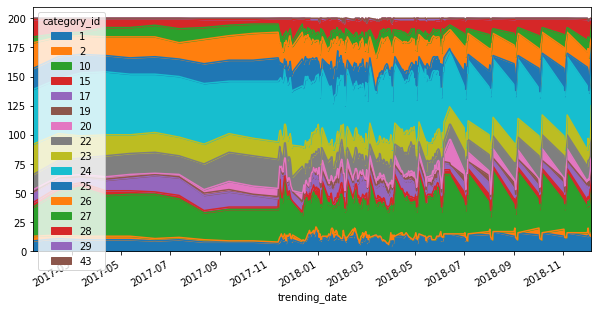

In [131]:
ds_reshaped.plot.area(x=None, figsize=(10,5))

In [36]:
ds_reshaped.columns 
ds_reshaped.index

DatetimeIndex(['2017-01-12', '2017-02-12', '2017-03-12', '2017-04-12',
               '2017-05-12', '2017-06-12', '2017-07-12', '2017-08-12',
               '2017-09-12', '2017-10-12',
               ...
               '2018-10-06', '2018-11-02', '2018-11-03', '2018-11-05',
               '2018-11-06', '2018-12-01', '2018-12-02', '2018-12-03',
               '2018-12-05', '2018-12-06'],
              dtype='datetime64[ns]', name='trending_date', length=205, freq=None)

In [44]:
ds_reshaped.to_csv('ds.csv', sep = ';', index = True)